# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

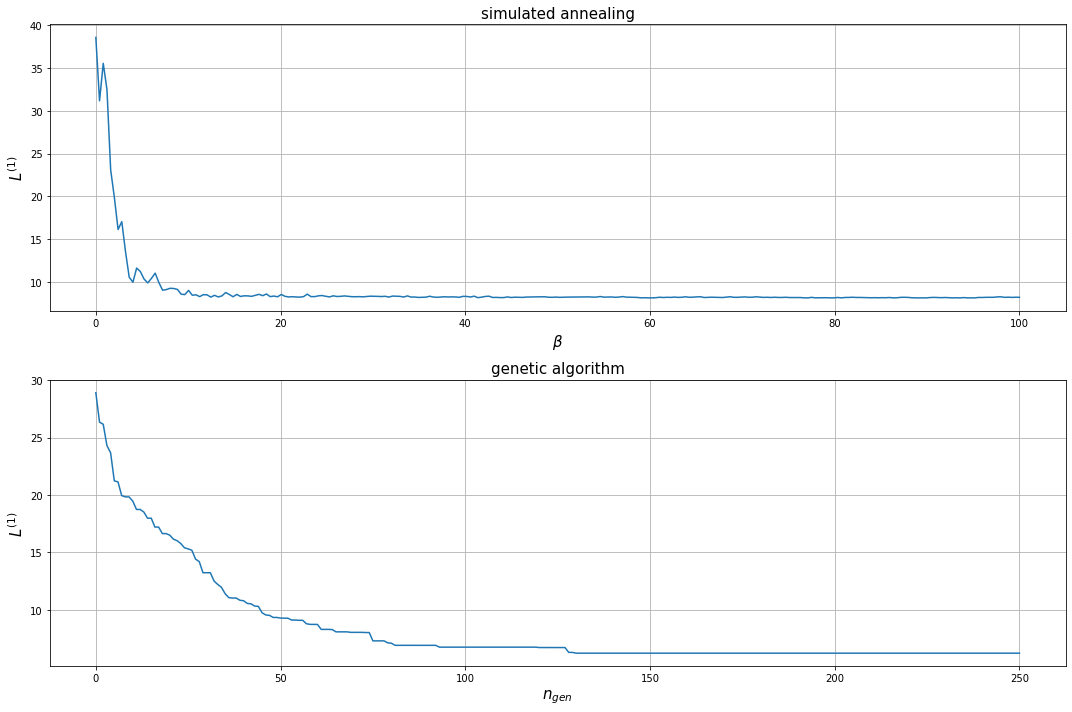

In [880]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(path_sim, path_gen):
    """
    Plot L1 loss for simulated annealing and genetic alogrithm.
    """
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    
    # simulated annealing
    beta, loss = np.loadtxt(path_sim, delimiter=",", unpack=True, skiprows=1)
    ax[0].plot(beta, loss)
    ax[0].set_xlabel(r"$\beta$", size=15)
    ax[0].set_ylabel(r"$L^{(1)}$", size=15)
    ax[0].grid()
    ax[0].set_title("simulated annealing", size=15)
    
    # genetic algorithm
    n_gen, loss, trash = np.loadtxt(path_gen, delimiter=",", unpack=True, skiprows=1)
    ax[1].plot(n_gen, loss)
    ax[1].set_xlabel(r"$n_{gen}$", size=15)
    ax[1].set_ylabel(r"$L^{(1)}$", size=15)
    ax[1].grid()
    ax[1].set_title("genetic algorithm", size=15)
    
    plt.tight_layout()
    plt.show()
                                                                                                    
plot_loss("data/circle/l1_sim.txt", "data/circle/l1_gen.txt")

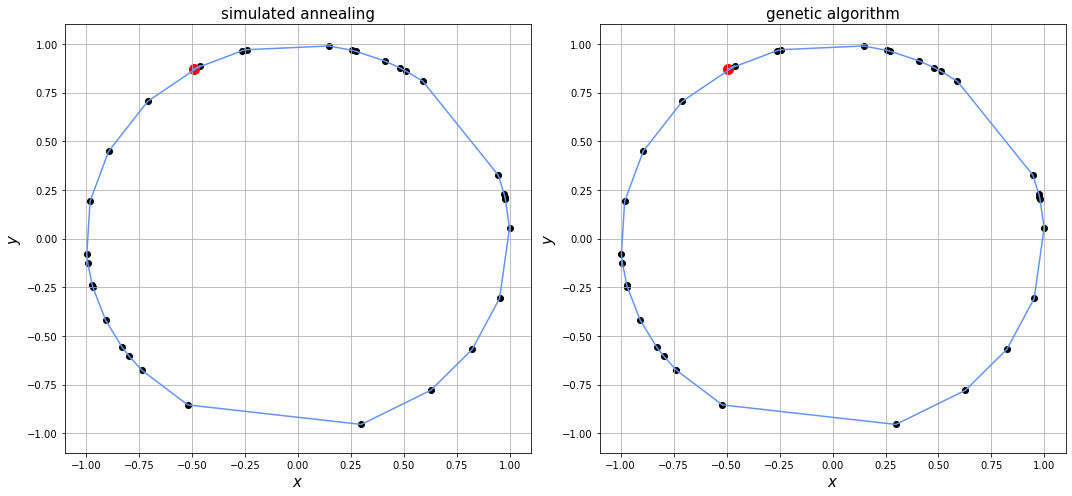

In [900]:
def plot_best(path):
    """
    Plot of best path for simulated annealing and genetic algorithm.
    """

    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    
    # simulated annealing
    x, y = np.loadtxt(path + "map.txt", unpack=True, delimiter=",", skiprows=1)
    best_path = np.loadtxt(path + "l1_path_sim.txt", delimiter=",", dtype=int)[-1]

    # insert start and end city (fixed for all individuals)
    best_path = np.insert(best_path, 0, 0, axis=0)
    best_path = np.append(best_path, 0)
    
    ax[0].scatter(x, y, marker="o", color="k")
    ax[0].scatter(x[0], y[0], marker="o", color="r", s=100)
    ax[0].plot(x[best_path], y[best_path], color="cornflowerblue")
    ax[0].set_xlabel("$x$", size=15)
    ax[0].set_ylabel("$y$", size=15)
    ax[0].set_xlim(-1.1, 1.1)
    ax[0].set_ylim(-1.1, 1.1)
    ax[0].set_title("simulated annealing", size=15)
    ax[0].grid()
    
    ax[1].scatter(x, y, marker="o", color="k")
    ax[1].scatter(x[0], y[0], marker="o", color="r", s=100)
    ax[1].plot(x[best_path], y[best_path], color="cornflowerblue")
    ax[1].set_xlabel("$x$", size=15)
    ax[1].set_ylabel("$y$", size=15)
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)
    ax[1].set_title("genetic algorithm", size=15)
    ax[1].grid()
    
    plt.tight_layout()
    plt.show()
    
plot_best("data/circle/")

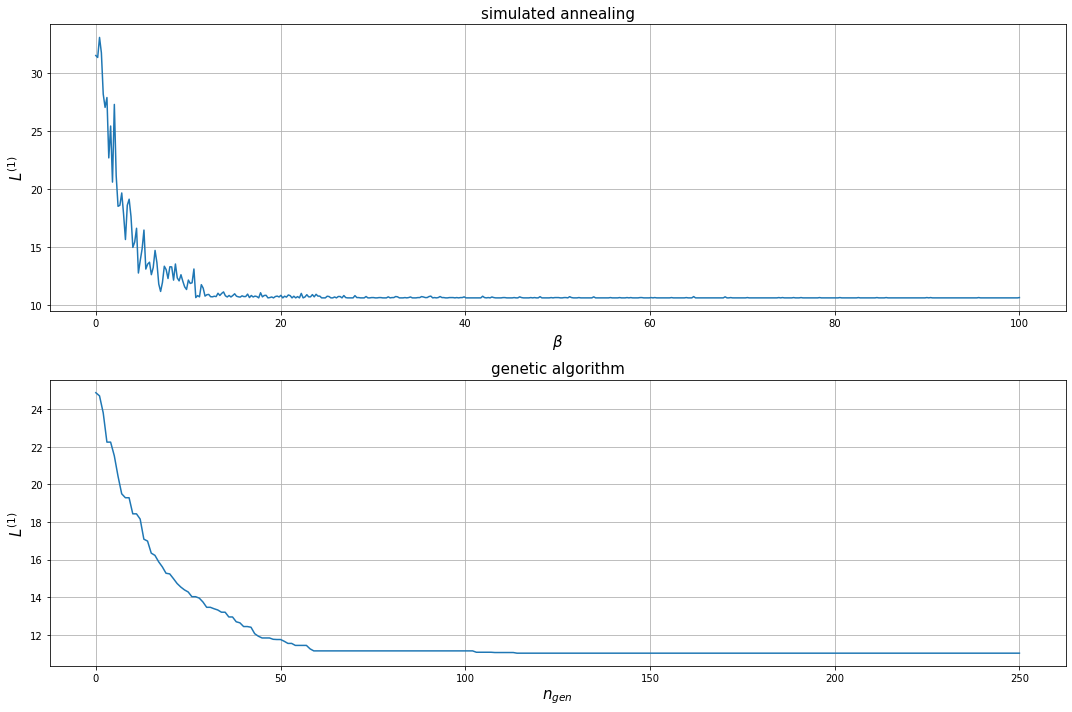

In [901]:
plot_loss("data/square/l1_sim.txt", "data/square/l1_gen.txt")

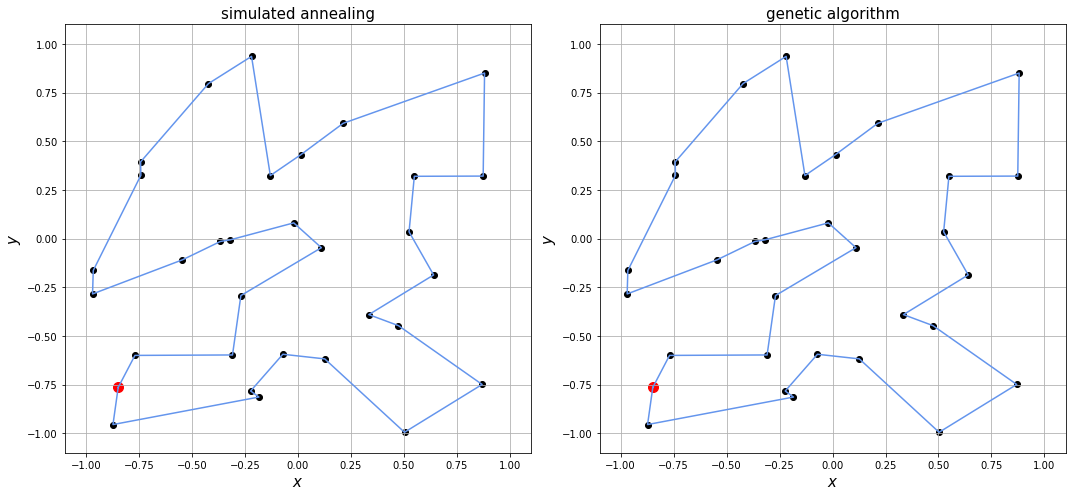

In [902]:
plot_best("data/square/")

### Exercise 10.2

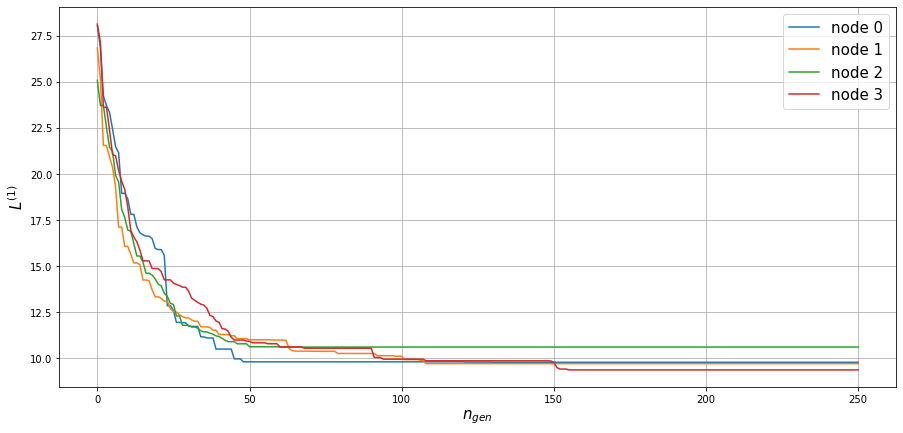

In [964]:
def plot_continent_loss(path_list, label_list):
    
    plt.figure(figsize=(15, 7))
    
    for i, path in enumerate(path_list):
        ngen, loss_best, loss_mean = np.loadtxt(path, delimiter=",", unpack=True, skiprows=1)
        plt.plot(ngen, loss_best, label=label_list[i])
    
    plt.xlabel(r"$n_{gen}$", size=15)
    plt.ylabel(r"$L^{(1)}$", size=15)
    plt.legend(fontsize=15)
    plt.grid()
    plt.show()
    
path_list = ["data/non_parallel/l1_rank=0.txt",
             "data/non_parallel/l1_rank=1.txt", 
             "data/non_parallel/l1_rank=2.txt", 
             "data/non_parallel/l1_rank=3.txt"]
label_list = ["node 0", 
              "node 1", 
              "node 2", 
              "node 3"]
plot_continent_loss(path_list, label_list)

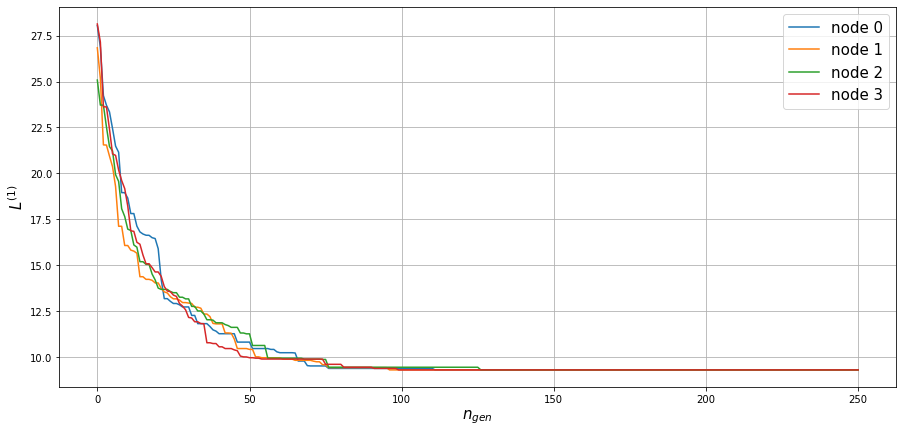

In [966]:
path_list = ["data/parallel/l1_rank=0.txt",
             "data/parallel/l1_rank=1.txt", 
             "data/parallel/l1_rank=2.txt", 
             "data/parallel/l1_rank=3.txt"]
label_list = ["node 0", 
              "node 1", 
              "node 2", 
              "node 3"]
plot_continent_loss(path_list, label_list)